In [1]:
from matplotlib import pyplot as mp
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.widgets import Slider

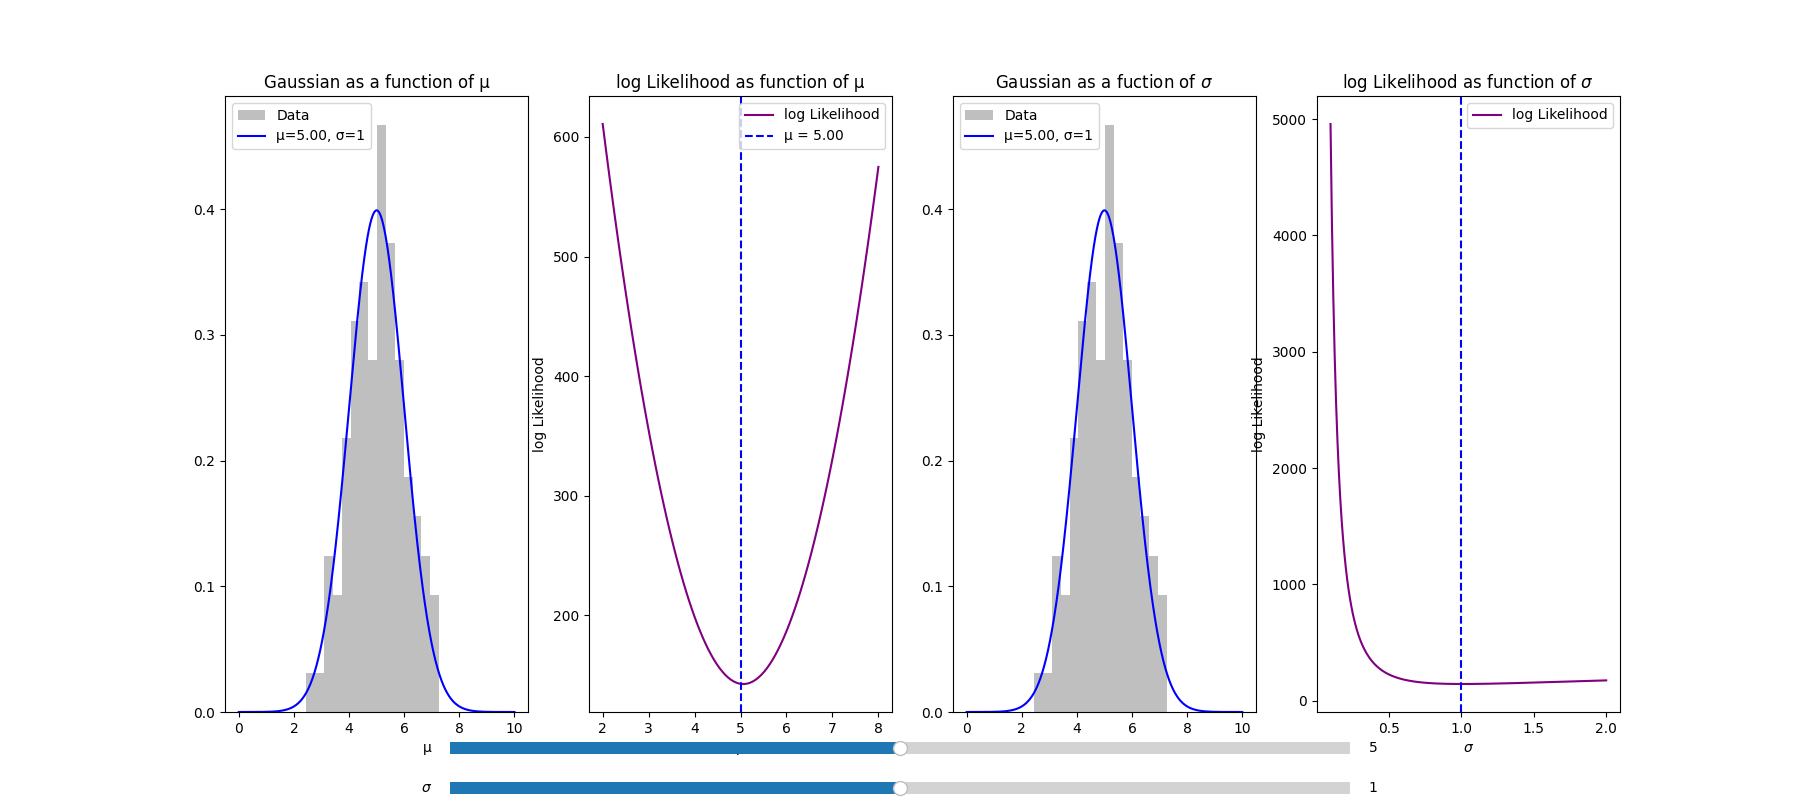

In [52]:
%matplotlib widget
np.random.seed(0)
true_mu, true_sigma = 5, 1
data = np.random.normal(true_mu, true_sigma, size=100)

fig, ax = plt.subplots(1, 4, figsize=(18, 8))
mu_range = np.linspace(2, 8, 100)
sigma_range = np.linspace(0.1, 2, 200)

def log_likelihood(data,mu, sigma):
    
    log_likelihood_values = -np.log(sigma * np.sqrt(2 * np.pi)) - (data - mu)**2 / (2 * sigma**2)

    return -np.sum(log_likelihood_values)


log_likelihood_values_mue = [log_likelihood(data, mu, true_sigma) for mu in mu_range]
log_likelihood_values_sigma = [log_likelihood(data, true_mu ,sigma) for sigma in sigma_range]

ax[0].hist(data, bins=15, density=True, alpha=0.5, color="gray", label="Data")
x_vals = np.linspace(0, 10, 1000)
y_vals = norm.pdf(x_vals, true_mu, true_sigma)
gaussian_plot_mue, = ax[0].plot(x_vals, y_vals, color="blue", label=f"μ={true_mu:.2f}, σ={true_sigma}")
ax[0].set_title("Gaussian as a function of μ")
ax[0].legend()

ll_plot_mue, = ax[1].plot(mu_range, log_likelihood_values_mue, color="purple", label="log Likelihood")
vline_mue = ax[1].axvline(true_mu, color="blue", linestyle="dashed", label=f"μ = {true_mu:.2f}")
ax[1].set_xlabel("μ")
ax[1].set_ylabel("log Likelihood")
ax[1].set_title("log Likelihood as function of μ")
ax[1].legend()

ax[2].hist(data, bins=15, density=True, alpha=0.5, color="gray", label="Data")
x_vals = np.linspace(0, 10, 1000)
y_vals = norm.pdf(x_vals, true_mu, true_sigma)
gaussian_plot_sigma, = ax[2].plot(x_vals, y_vals, color="blue", label=f"μ={true_mu:.2f}, σ={true_sigma}")
ax[2].set_title(R"Gaussian as a fuction of $\sigma$ ")
ax[2].legend()

ll_plot_sigma, = ax[3].plot(sigma_range, log_likelihood_values_sigma, color="purple", label="log Likelihood")
vline_sigma = ax[3].axvline(true_sigma, color="blue", linestyle="dashed")
ax[3].set_xlabel(R"$\sigma$")
ax[3].set_ylabel("log Likelihood")
ax[3].set_title(R"log Likelihood as function of $\sigma$")
ax[3].legend()

ax_mu = plt.axes([0.25, 0.05, 0.5, 0.03])
ax_sigma = plt.axes([0.25, 0., 0.5, 0.03])
slider_mu = Slider(ax_mu, 'μ', 2, 8, valinit=true_mu)
slider_sigma = Slider(ax_sigma, R'$\sigma$', 0, 2, valinit=true_sigma)

def update(val):
    mu_val = slider_mu.val
    sigma_val = slider_sigma.val
    new_y_vals_mue = norm.pdf(x_vals, mu_val, true_sigma)
    gaussian_plot_mue.set_ydata(new_y_vals_mue)  
    
    new_y_vals_sigma = norm.pdf(x_vals,true_mu, sigma_val,)
    gaussian_plot_sigma.set_ydata(new_y_vals_sigma)  
    vline_mue.set_xdata([mu_val, mu_val])
    vline_mue.set_label(f"μ")
    vline_sigma.set_xdata([sigma_val, sigma_val])
    vline_sigma.set_label(f"μ")
    ax[1].legend()


slider_mu.on_changed(update)
slider_sigma.on_changed(update)
plt.show()